In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ford.csv')

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [4]:
df.shape

(17966, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [6]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


#### Car Manufacture Year: **1996 - 2060** (There is mistake)
#### Car Price: avg price = ~**12200**
minimum price = ~**500**\
maximum price = ~**55000**
#### Car Mileage: avg mileage = ~**23300**
minimum mileage = **1**\
maximum mileage = ~**177600**
#### Car Tax: avg tax = ~**110**
minimum tax = **0**\
maximum tax = ~**600**
#### mpg: avg mpg = ~**60**
minimum mpg = **20**\
maximum mpg = ~**200**
#### Engine Size:
minimum engine size = **1**\
maximum engine size = **5**

In [7]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

**No null values**

In [8]:
df.duplicated().sum()

154

**154 Duplicate values**

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

**Duplicate values removed**

In [11]:
df['year'].value_counts()

year
2017    4854
2018    3982
2019    3152
2016    2314
2015    1355
2014     799
2013     606
2020     252
2012     115
2011      94
2009      91
2010      67
2008      56
2007      32
2005      16
2006      13
2004       4
2002       3
2003       3
1998       1
1996       1
2000       1
2060       1
Name: count, dtype: int64

In [12]:
df[df['year'] == 2060]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17726,Fiesta,2060,6495,Automatic,54807,Petrol,205,42.8,1.4


In [13]:
df.loc[df['year'] == 2060, 'year'] = df['year'].mode()[0]

**Year 2060 is replaced with most occurred year**

## EDA

In [14]:
cat_columns = ['model', 'year', 'transmission', 'fuelType']
num_columns = ['price', 'mileage', 'tax', 'mpg', 'engineSize']

Text(0.5, 1.0, 'Fuel Types')

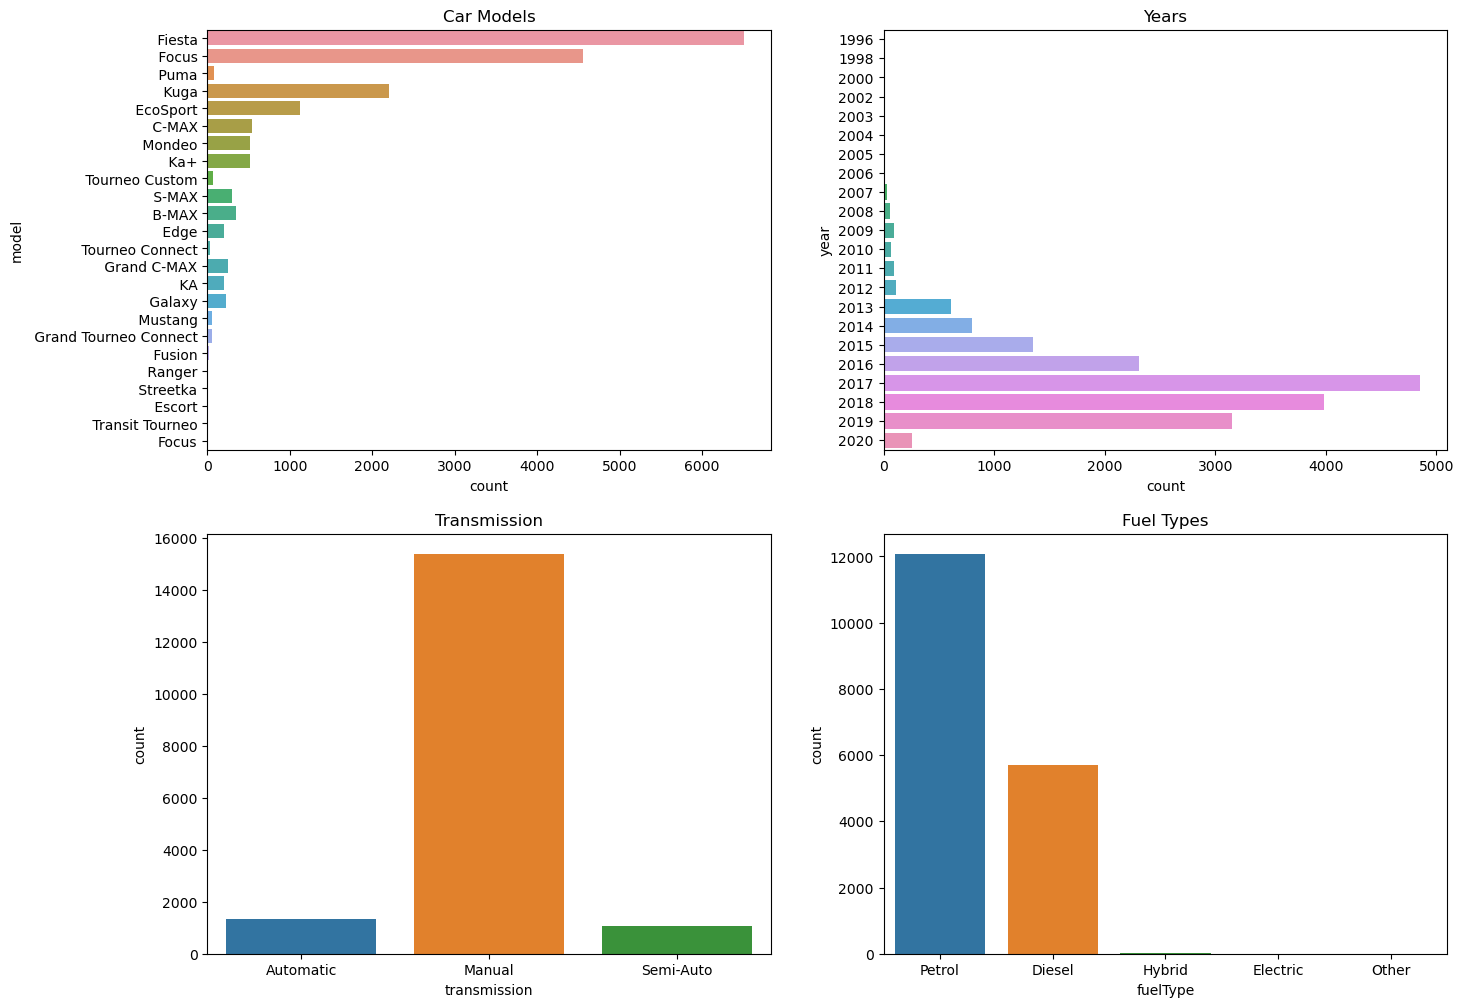

In [15]:
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
sns.countplot(y=df['model'])
plt.title('Car Models')
plt.subplot(2,2,2)
sns.countplot(y=df['year'])
plt.title('Years')
plt.subplot(2,2,3)
sns.countplot(x=df['transmission'])
plt.title('Transmission')
plt.subplot(2,2,4)
sns.countplot(x=df['fuelType'])
plt.title('Fuel Types')

**Fiesta, Focus and Kuga is most used car models**\
**Most sales are in 2016, 2017, 2018, 2019**\
**Manual cars are most used**\
**Petrol and Diesel car are used most**

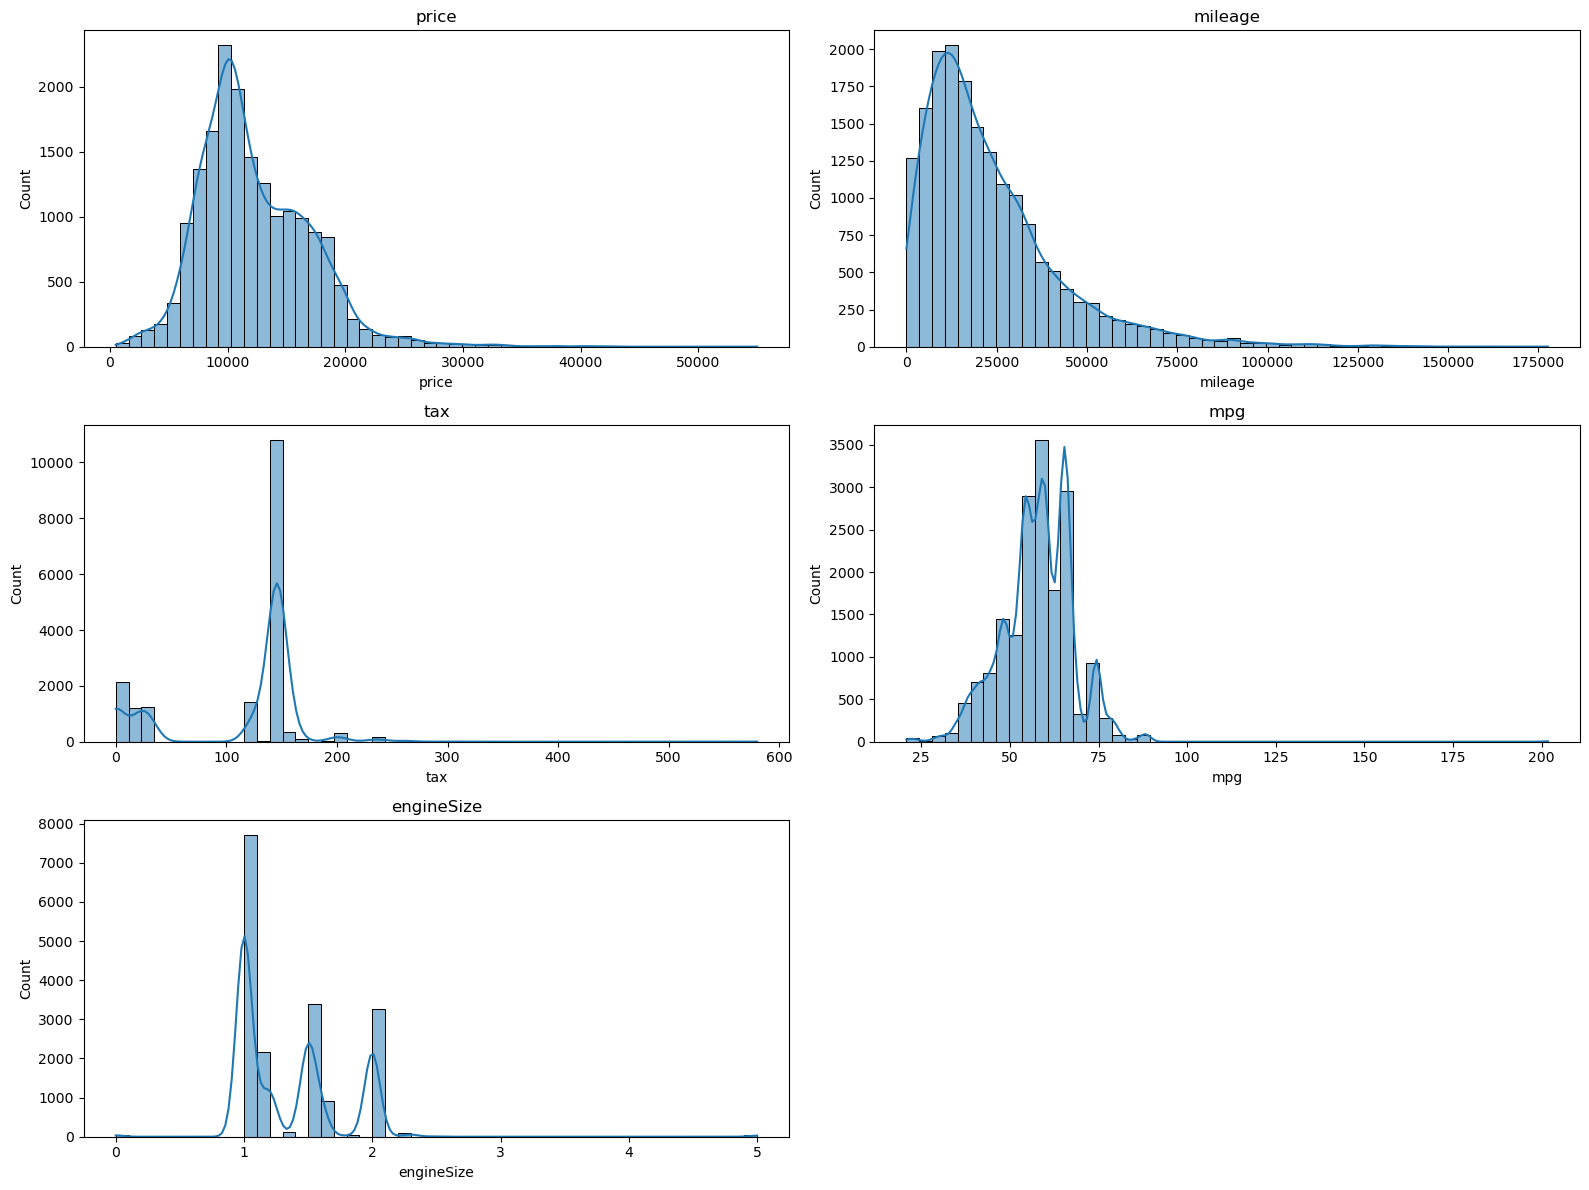

In [16]:
plt.figure(figsize=(16,12))
num = 1
for col in num_columns:
    plt.subplot(3,2,num)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(col)
    num += 1
plt.tight_layout()

**Most car prices are around 10000**\
**Most cars mileage is between 0 and 30000**\
**Most cars gives mpg (miles per gallon) between 50-75**

In [17]:
df['tax'].value_counts()

tax
145    8849
0      2137
150    1934
125    1403
30     1226
20     1198
160     357
200     247
235     122
165     113
205      60
260      41
240      32
265      15
300      11
135      10
140       8
570       6
195       6
325       6
555       4
115       3
155       3
220       3
330       2
305       2
230       2
580       2
190       2
120       2
210       1
185       1
110       1
270       1
290       1
22        1
Name: count, dtype: int64

**Taxes on most of the cars is 145**

In [18]:
df['engineSize'].value_counts()

engineSize
1.0    7702
1.5    3393
2.0    3273
1.2    1613
1.6     918
1.1     550
1.4     112
2.3      80
0.0      51
5.0      45
1.8      35
2.2      13
2.5      13
1.3      12
3.2       1
1.7       1
Name: count, dtype: int64

**Most cars have engine size of 1, 1.5, 2, 1.2**

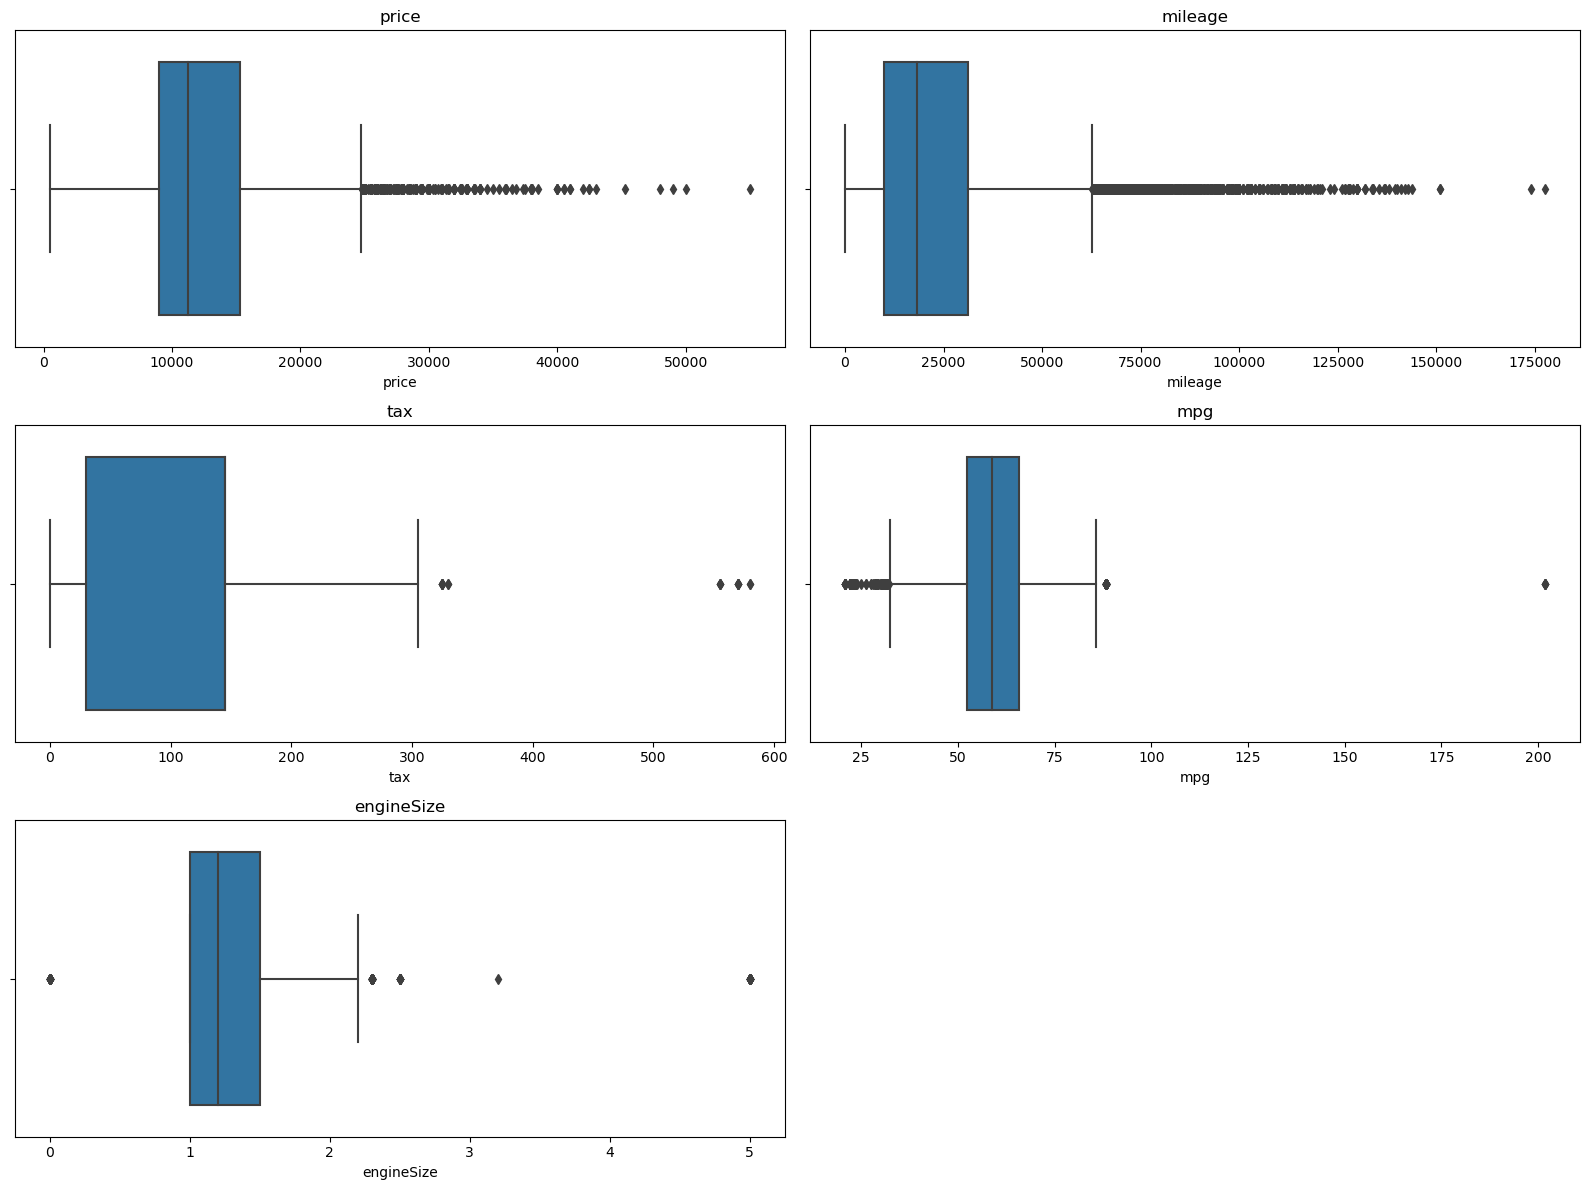

In [19]:
plt.figure(figsize=(16,12))
num = 1
for col in num_columns:
    plt.subplot(3,2,num)
    sns.boxplot(x=df[col])
    plt.title(col)
    num += 1
plt.tight_layout()

**There is possibility that a car price can be high like $50000**\
**A car drove over 150000 mileage can be possible**\
**Tax can also be high in some cases**\
**There is few cars that have over 200 mpg which looks unreal for a car (google info) but i will leave it as it is**\
**Engine sizes are likely good**

## Checking Relationship of all Features with Output (price) Feature

<Axes: >

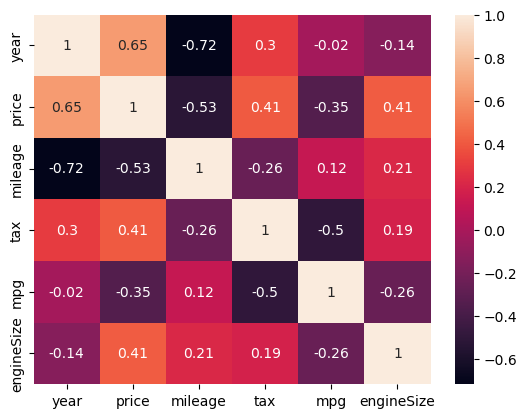

In [20]:
sns.heatmap(df.corr(numeric_only = True), annot=True)

**All the features have good relations with price of the car**

<Axes: xlabel='mileage', ylabel='price'>

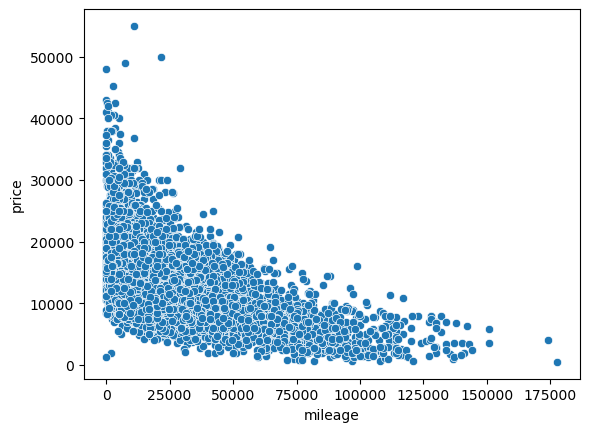

In [21]:
sns.scatterplot(data=df, x='mileage', y='price')

**When mileage is low the price is high and vice versa**

<Axes: xlabel='year', ylabel='price'>

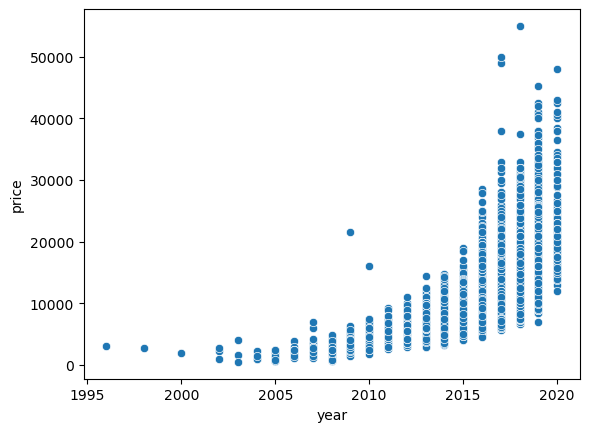

In [22]:
sns.scatterplot(data=df, x='year', y='price')

**In starting several years the prices of car is generally low compare to years after 2015**

<Axes: xlabel='transmission', ylabel='price'>

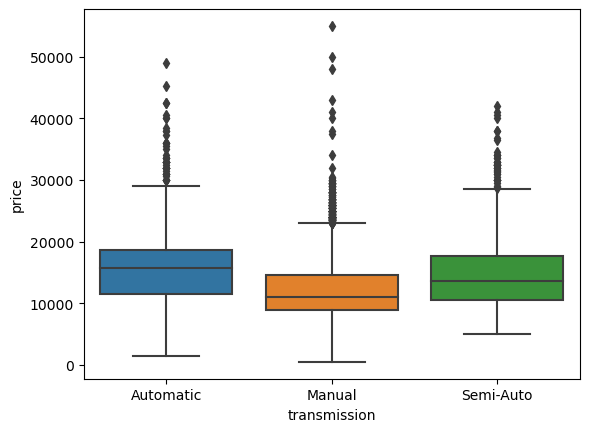

In [23]:
sns.boxplot(data=df, x='transmission', y='price')

**There is not much relation between transmission and price**

In [24]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, ' Fiesta'),
  Text(1, 0, ' Focus'),
  Text(2, 0, ' Puma'),
  Text(3, 0, ' Kuga'),
  Text(4, 0, ' EcoSport'),
  Text(5, 0, ' C-MAX'),
  Text(6, 0, ' Mondeo'),
  Text(7, 0, ' Ka+'),
  Text(8, 0, ' Tourneo Custom'),
  Text(9, 0, ' S-MAX'),
  Text(10, 0, ' B-MAX'),
  Text(11, 0, ' Edge'),
  Text(12, 0, ' Tourneo Connect'),
  Text(13, 0, ' Grand C-MAX'),
  Text(14, 0, ' KA'),
  Text(15, 0, ' Galaxy'),
  Text(16, 0, ' Mustang'),
  Text(17, 0, ' Grand Tourneo Connect'),
  Text(18, 0, ' Fusion'),
  Text(19, 0, ' Ranger'),
  Text(20, 0, ' Streetka'),
  Text(21, 0, ' Escort'),
  Text(22, 0, ' Transit Tourneo'),
  Text(23, 0, 'Focus')])

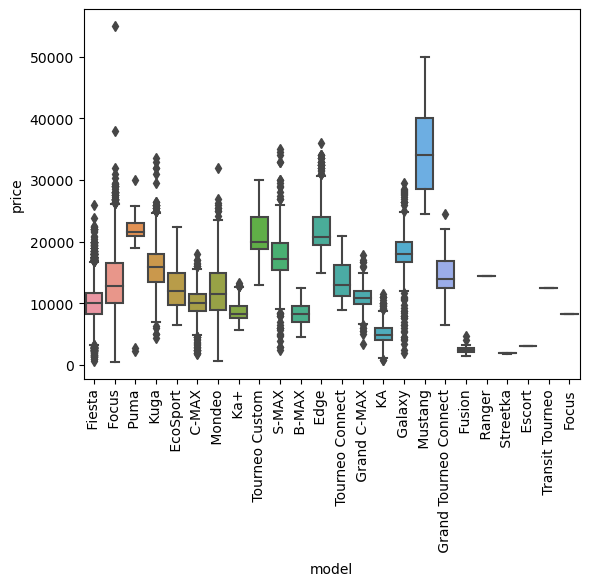

In [25]:
sns.boxplot(data=df, x='model', y='price')
plt.xticks(rotation=90)

**Mustang model cars have high prices**

<Axes: xlabel='fuelType', ylabel='price'>

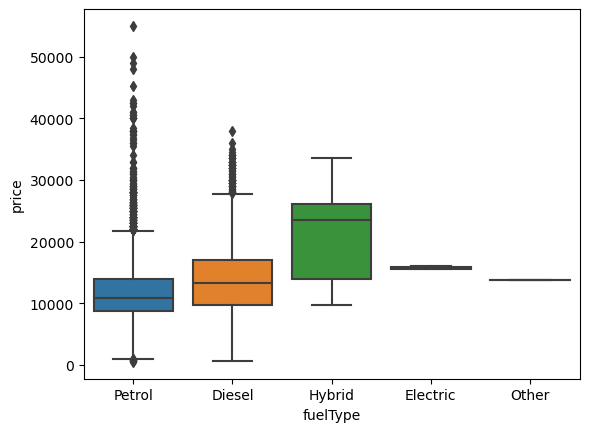

In [26]:
sns.boxplot(data=df, x='fuelType', y='price')

**The cars with fuel type of Petrol have high prices**

<Axes: xlabel='tax', ylabel='price'>

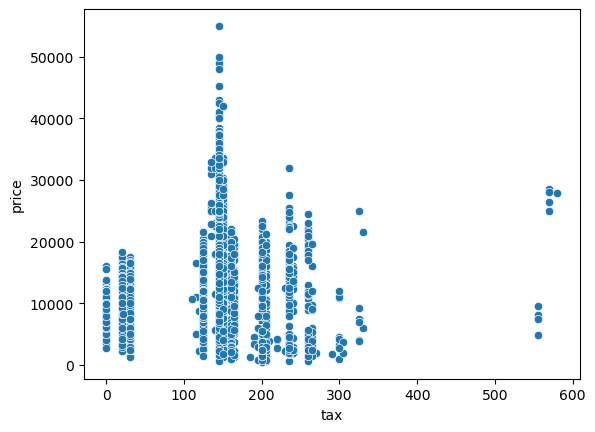

In [27]:
sns.scatterplot(data=df, x='tax', y='price')

**Cars with tax between 100-200 have high prices**

<Axes: xlabel='mpg', ylabel='price'>

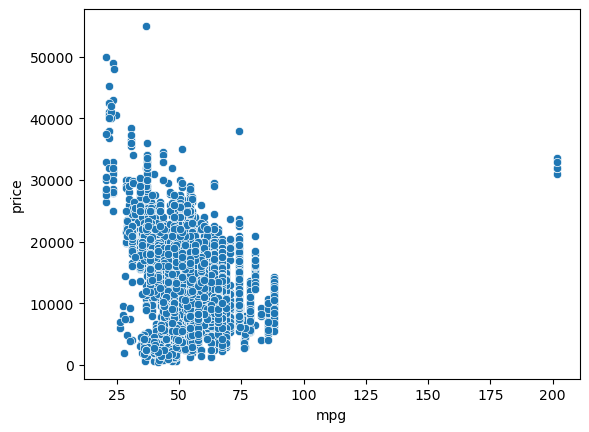

In [28]:
sns.scatterplot(data=df, x='mpg', y='price')

**low mpg cars have higher price and high mpg cars have lower price**

#### **Conclusion:- All the features have some relation with price feature, so let's use all the features to create model**

## Data Preprocessing

In [29]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [30]:
X = df.drop(columns=['price'], axis=1)  # All input features
y = df['price']  # Output feature (price)

In [31]:
X_one_hot_encoded = pd.get_dummies(X, columns=['model', 'transmission', 'fuelType'], drop_first=True)

In [32]:
X_one_hot_encoded = X_one_hot_encoded.astype(float)
X_one_hot_encoded.head()

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017.0,15944.0,150.0,57.7,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2018.0,9083.0,150.0,57.7,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2017.0,12456.0,150.0,57.7,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2019.0,10460.0,145.0,40.3,1.5,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,2019.0,1482.0,145.0,48.7,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
columns = ['model', 'transmission', 'fuelType']
X_label_encoded = X.copy()

for col in columns:
    X_label_encoded[col] = encode.fit_transform(X_label_encoded[col])

In [34]:
X_label_encoded.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,0,15944,4,150,57.7,1.0
1,6,2018,1,9083,4,150,57.7,1.0
2,6,2017,1,12456,4,150,57.7,1.0
3,5,2019,1,10460,4,145,40.3,1.5
4,5,2019,0,1482,4,145,48.7,1.0


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

X_one_hot_encoded[columns] = scaler.fit_transform(X_one_hot_encoded[columns])
X_label_encoded[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize']] = scaler.fit_transform(X_label_encoded[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize']])

In [36]:
X_one_hot_encoded.head()

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.069098,-0.382994,0.591380,-0.020597,-0.810561,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.562593,-0.736317,0.591380,-0.020597,-0.810561,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.069098,-0.562616,0.591380,-0.020597,-0.810561,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.056087,-0.665405,0.510777,-1.737858,0.345325,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.056087,-1.127749,0.510777,-0.908836,-0.810561,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
X_label_encoded.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,-0.460281,0.069098,-2.667947,-0.382994,0.688206,0.591380,-0.020597,-0.810561
1,-0.210828,0.562593,0.042455,-0.736317,0.688206,0.591380,-0.020597,-0.810561
2,-0.210828,0.069098,0.042455,-0.562616,0.688206,0.591380,-0.020597,-0.810561
3,-0.460281,1.056087,0.042455,-0.665405,0.688206,0.510777,-1.737858,0.345325
4,-0.460281,1.056087,-2.667947,-1.127749,0.688206,0.510777,-0.908836,-0.810561


## Training Model

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [39]:
X_one_train, X_one_test, y_one_train, y_one_test = train_test_split(X_one_hot_encoded, y, test_size=0.20, random_state=42)

In [40]:
model = LinearRegression()
model.fit(X_one_train, y_one_train)

LinearRegression()

In [41]:
y_one_pred = model.predict(X_one_test)

In [42]:
r2_one = r2_score(y_one_test, y_one_pred)
r2_one

0.8533013999182211

In [43]:
X_label_train, X_label_test, y_label_train, y_label_test = train_test_split(X_label_encoded, y, test_size=0.20, random_state=42)

In [44]:
model2 = LinearRegression()
model2.fit(X_label_train, y_label_train)

LinearRegression()

In [45]:
y_label_pred = model2.predict(X_label_test)

In [46]:
r2_label = r2_score(y_label_test, y_label_pred)
r2_label

0.7495399819645852